<a href="https://colab.research.google.com/github/UVI2k/Portfolio-Projects/blob/main/Yelp_Business_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Management and Analysis with Yelp API and Apache Spark






### **Data Collection with Yelp API**


1.1 - Setup Yelp API
Before collecting data, you'll need to set up access to the Yelp API. Make sure you have your API key as outlined in the final project assignment document.

In [ ]:
# Yelp API Key
api_key = 'tDJj6lc75aXCR-Qu7i1oRSOY6LczgPD4tZ-CK88b-FZxQEdWulfUo9G-TfrvQ4GH3-_4i3G8OlhYvkjLTXnaYPrGR8gbBd2O3SaN6d0EXOjtjtRUJDZ2g20fFQhRZ3Yx'  # Replace with your API key

# Yelp API endpoint for Business Search
endpoint_url = 'https://api.yelp.com/v3/businesses/search'

# Headers for authenticating the API request
headers = {
    'Authorization': f'Bearer {api_key}',
 }


1.2 - Making an API Request and Extracting Data
Use the Yelp API to fetch data based on your business idea. Adjust the parameters as necessary (location, categories, price range, etc.).

In [ ]:
import requests
import pandas as pd

#initiating a an empty-list to collect all data before making a dataframe
EdmontonBusinesses = []

# Search parameters

terms = ['restaurants', 'bars', 'cafes']
locations = ['Edmonton', 'Sherwood Park', 'Beaumont']
maximum_radius = 15000 #15km range
max_data_per_request = 50
required_results = 1000
max_offset = 40  # Choosing offset as 40; to make it under 6 requests (40 x 6 = 240)
total_results_per_term = 240  # Max results retrievable per term

for location in locations:
  """
  Since we are planning to work with 3 locations
  """
  for term in terms:
    """
    Since we are looking for 3 terms
    """

    for offset in range(0, 240, 40):
      """
      Here we are running offset from 0-1000 with step-size 40
      so that with each request it
      fetches data index: 0-49, 50-99, 100-149,......, 950-999
      """
      params = {
      'location': location,
      'term': term,
      'limit': 40,
      'offset': offset
        }


      # Making the GET request to Yelp API
      response = requests.get(endpoint_url, headers=headers, params=params)
      if response.status_code == 200:
          data = response.json()
          EdmontonBusinesses.extend(data['businesses'])
      else:
          # Print error message if the request failed
          print(f"Error: Request failed with status code {response.status_code}")
          print(response.text)


df = pd.DataFrame(EdmontonBusinesses)

# Display the DataFrame
df.head()


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,business_hours,attributes,price
0,gDFjUfoAdiRYNaHBgAPFhg,little-wolf-edmonton,Little Wolf,https://s3-media2.fl.yelpcdn.com/bphoto/NxC-1n...,False,https://www.yelp.com/biz/little-wolf-edmonton?...,2,"[{'alias': 'newcanadian', 'title': 'Canadian (...",4.5,"{'latitude': 53.52060631866052, 'longitude': -...",[],"{'address1': '8424 109 Street NW', 'address2':...",,,934.094295,[],"{'business_temp_closed': None, 'menu_url': Non...",NaN
1,lEr79JhaO3O1XqBpD2zENg,sauce-caribbean-edmonton,Sauce Caribbean,https://s3-media1.fl.yelpcdn.com/bphoto/M62Fgv...,False,https://www.yelp.com/biz/sauce-caribbean-edmon...,11,"[{'alias': 'caribbean', 'title': 'Caribbean'}]",4.6,"{'latitude': 53.598365, 'longitude': -113.5729...",[],"{'address1': '13655 St Albert Trail', 'address...",+18254012535,+1 825-401-2535,8791.286039,"[{'open': [{'is_overnight': False, 'start': '1...","{'business_temp_closed': None, 'menu_url': Non...",NaN
2,FgLO3jQX1XjaqILsG3nN1Q,flat-boy-burgers-edmonton,Flat Boy Burgers,https://s3-media4.fl.yelpcdn.com/bphoto/tW6cWk...,False,https://www.yelp.com/biz/flat-boy-burgers-edmo...,17,"[{'alias': 'burgers', 'title': 'Burgers'}]",4.8,"{'latitude': 53.51450555082495, 'longitude': -...",[],"{'address1': '9908 78 Avenue NW', 'address2': ...",+17802174650,+1 780-217-4650,2190.792114,"[{'open': [{'is_overnight': False, 'start': '1...","{'business_temp_closed': None, 'menu_url': 'ht...",NaN
3,gtXAx_G5j6K1TmuJ2v5Rbg,rge-rd-edmonton,RGE RD,https://s3-media2.fl.yelpcdn.com/bphoto/Br_RNN...,False,https://www.yelp.com/biz/rge-rd-edmonton?adjus...,185,"[{'alias': 'newcanadian', 'title': 'Canadian (...",4.3,"{'latitude': 53.5507814, 'longitude': -113.533...",[],"{'address1': '10643 - 123 Street', 'address2':...",+17804474577,+1 780-447-4577,2927.754959,"[{'open': [{'is_overnight': False, 'start': '1...","{'business_temp_closed': None, 'menu_url': Non...",$$$
4,dHV02LqcZeVYyKlTO9-Btg,sylv-s-retro-diner-edmonton,Sylv’s Retro Diner,https://s3-media1.fl.yelpcdn.com/bphoto/wiBsym...,False,https://www.yelp.com/biz/sylv-s-retro-diner-ed...,1,"[{'alias': 'burgers', 'title': 'Burgers'}]",5.0,"{'latitude': 53.48738, 'longitude': -113.45805}",[],"{'address1': '8707 51 Avenue NW', 'address2': ...",+17802032886,+1 780-203-2886,5701.943691,"[{'open': [{'is_overnight': False, 'start': '1...","{'business_temp_closed': None, 'menu_url': Non...",NaN


# Here we see how many data-points have we retrieved

In [ ]:
df['id'].count()

1452

1.3 - Save Data to CSV
Once the data is collected, save it to a CSV file for future use.

In [ ]:
df.to_csv('Edm_Yelp_csv_raw.csv')

# Now we extract the categories field to make it easily accessible

In [ ]:
#Here we use df.explode function to access list elements separately
df_exploded = df.explode('categories')
print(df_exploded[['name', 'categories']].head(10))

                 name                                         categories
0         Little Wolf  {'alias': 'newcanadian', 'title': 'Canadian (N...
1     Sauce Caribbean       {'alias': 'caribbean', 'title': 'Caribbean'}
2    Flat Boy Burgers           {'alias': 'burgers', 'title': 'Burgers'}
3              RGE RD  {'alias': 'newcanadian', 'title': 'Canadian (N...
4  Sylv’s Retro Diner           {'alias': 'burgers', 'title': 'Burgers'}
5          Leo's Cafe               {'alias': 'cafes', 'title': 'Cafes'}
5          Leo's Cafe  {'alias': 'breakfast_brunch', 'title': 'Breakf...
5          Leo's Cafe               {'alias': 'pizza', 'title': 'Pizza'}
6   Blowers & Grafton  {'alias': 'newcanadian', 'title': 'Canadian (N...
7   Campiō Brewing Co     {'alias': 'tradamerican', 'title': 'American'}


In [ ]:
#Function to extract just the title value

def extract_title(category):
    return category['title']

df_exploded['categories_title'] = df_exploded['categories'].apply(extract_title)
print(df_exploded[['name','categories_title']])

                    name categories_title
0            Little Wolf   Canadian (New)
1        Sauce Caribbean        Caribbean
2       Flat Boy Burgers          Burgers
3                 RGE RD   Canadian (New)
4     Sylv’s Retro Diner          Burgers
...                  ...              ...
1450          McDonald's          Burgers
1450          McDonald's     Coffee & Tea
1451          McDonald's        Fast Food
1451          McDonald's          Burgers
1451          McDonald's     Coffee & Tea

[3005 rows x 2 columns]


In [ ]:
df_exploded.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,business_hours,attributes,price,categories_title
0,gDFjUfoAdiRYNaHBgAPFhg,little-wolf-edmonton,Little Wolf,https://s3-media2.fl.yelpcdn.com/bphoto/NxC-1n...,False,https://www.yelp.com/biz/little-wolf-edmonton?...,2,"{'alias': 'newcanadian', 'title': 'Canadian (N...",4.5,"{'latitude': 53.52060631866052, 'longitude': -...",[],"{'address1': '8424 109 Street NW', 'address2':...",,,934.094295,[],"{'business_temp_closed': None, 'menu_url': Non...",NaN,Canadian (New)
1,lEr79JhaO3O1XqBpD2zENg,sauce-caribbean-edmonton,Sauce Caribbean,https://s3-media1.fl.yelpcdn.com/bphoto/M62Fgv...,False,https://www.yelp.com/biz/sauce-caribbean-edmon...,11,"{'alias': 'caribbean', 'title': 'Caribbean'}",4.6,"{'latitude': 53.598365, 'longitude': -113.5729...",[],"{'address1': '13655 St Albert Trail', 'address...",+18254012535,+1 825-401-2535,8791.286039,"[{'open': [{'is_overnight': False, 'start': '1...","{'business_temp_closed': None, 'menu_url': Non...",NaN,Caribbean
2,FgLO3jQX1XjaqILsG3nN1Q,flat-boy-burgers-edmonton,Flat Boy Burgers,https://s3-media4.fl.yelpcdn.com/bphoto/tW6cWk...,False,https://www.yelp.com/biz/flat-boy-burgers-edmo...,17,"{'alias': 'burgers', 'title': 'Burgers'}",4.8,"{'latitude': 53.51450555082495, 'longitude': -...",[],"{'address1': '9908 78 Avenue NW', 'address2': ...",+17802174650,+1 780-217-4650,2190.792114,"[{'open': [{'is_overnight': False, 'start': '1...","{'business_temp_closed': None, 'menu_url': 'ht...",NaN,Burgers
3,gtXAx_G5j6K1TmuJ2v5Rbg,rge-rd-edmonton,RGE RD,https://s3-media2.fl.yelpcdn.com/bphoto/Br_RNN...,False,https://www.yelp.com/biz/rge-rd-edmonton?adjus...,185,"{'alias': 'newcanadian', 'title': 'Canadian (N...",4.3,"{'latitude': 53.5507814, 'longitude': -113.533...",[],"{'address1': '10643 - 123 Street', 'address2':...",+17804474577,+1 780-447-4577,2927.754959,"[{'open': [{'is_overnight': False, 'start': '1...","{'business_temp_closed': None, 'menu_url': Non...",$$$,Canadian (New)
4,dHV02LqcZeVYyKlTO9-Btg,sylv-s-retro-diner-edmonton,Sylv’s Retro Diner,https://s3-media1.fl.yelpcdn.com/bphoto/wiBsym...,False,https://www.yelp.com/biz/sylv-s-retro-diner-ed...,1,"{'alias': 'burgers', 'title': 'Burgers'}",5.0,"{'latitude': 53.48738, 'longitude': -113.45805}",[],"{'address1': '8707 51 Avenue NW', 'address2': ...",+17802032886,+1 780-203-2886,5701.943691,"[{'open': [{'is_overnight': False, 'start': '1...","{'business_temp_closed': None, 'menu_url': Non...",NaN,Burgers


# Similarly we now extract the lat. and long. from coordinates field

In [ ]:
#We create two separate functions to extract latitude & longitude and then we make separate fields to store this information

def extract_latitude(coordinate):
    return coordinate['latitude']

def extract_longitude(coordinate):
  return coordinate['longitude']

df_exploded['latitude'] = df_exploded['coordinates'].apply(extract_latitude)
df_exploded['longitude'] = df_exploded['coordinates'].apply(extract_longitude)
print(df_exploded[['name','latitude', 'longitude']])

                    name   latitude   longitude
0            Little Wolf  53.520606 -113.512520
1        Sauce Caribbean  53.598365 -113.572962
2       Flat Boy Burgers  53.514506 -113.486606
3                 RGE RD  53.550781 -113.533804
4     Sylv’s Retro Diner  53.487380 -113.458050
...                  ...        ...         ...
1450          McDonald's  29.956584  -94.006904
1450          McDonald's  29.956584  -94.006904
1451          McDonald's  29.942135  -93.989900
1451          McDonald's  29.942135  -93.989900
1451          McDonald's  29.942135  -93.989900

[3005 rows x 3 columns]


In [ ]:
##Now we make a separate dataframe with only the required fields to pass into our spark sql

EdmontonBusinesses_spark = df_exploded[['id', 'name', 'categories_title', 'latitude', 'longitude', 'rating', 'review_count', 'location', "price"]]

In [ ]:
businesses_filtered = EdmontonBusinesses_spark[['name','categories_title','latitude', 'longitude', 'rating', 'review_count']]
businesses_filtered.to_excel('businesses_filtered.xlsx', index=False)

In [ ]:
EdmontonBusinesses_spark['id'].count()
EdmontonBusinesses_spark.to_csv('Edm_Buss_raw.csv')

In [ ]:
EdmontonBusinesses_spark_unique = EdmontonBusinesses_spark.drop_duplicates(subset=['id'])
EdmontonBusinesses_spark_unique['id'].count()

1291

**1.4 - Business Idea Explanation**

In this section, I explain a business idea and why the data points (like business name, rating, price, etc.) are important for the application.

### Business Idea: Name-- "QuickSort"
I  plan to help suppliers of restaurants to reach their customers faster. With the given data, locate the clusters of restaurants in different parts of Edmonton and create Dark Stores in those areas with food storage areas available for rent.

Unique Selling Point: With the available data we **strategically locate our dark stores** closest to particular categories of restaurants helping us to provide "**Under 15 minute Delivery**" so that restaurants do not have to store excess raw materials and can receive fresh ingredients whenever needed. *italicized text*






# **Part Two: Data Management with Apache Spark**
**2.1- Setting Up PySpark**

Now that we have the Yelp data, we'll set up Apache Spark to handle large datasets.

In [ ]:
!pip install pyspark
!pip install findspark

In [ ]:
# Importing necessary libraries for PySpark
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession

# Initialize the Spark session
spark = SparkSession.builder.appName('FinalProject').getOrCreate()

# Check if Spark session is initialized
spark


**2.2 - Loading Data into Spark DataFrame**

We'll load the data collected from Yelp into a Spark DataFrame.

In [ ]:

#Loading pandas df as spark df
edm_sc = spark.createDataFrame(EdmontonBusinesses_spark_unique)
edm_sc.registerTempTable("edm_sc")

# Display the schema and preview the data
edm_sc.printSchema()
edm_sc.show(5)


/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:329: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- categories_title: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- rating: double (nullable = true)
 |-- review_count: long (nullable = true)
 |-- location: map (nullable = true)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)
 |-- price: string (nullable = true)

+--------------------+------------------+----------------+-----------------+-------------------+------+------------+--------------------+-----+
|                  id|              name|categories_title|         latitude|          longitude|rating|review_count|            location|price|
+--------------------+------------------+----------------+-----------------+-------------------+------+------------+--------------------+-----+
|gDFjUfoAdiRYNaHBg...|       Little Wolf|  Canadian (New)|53.52060631866052|-113.51252049207687|   4.5|           2|{country -> CA, a...

**2.3 - Basic Operations on Data Using Spark DataFrame**

Here, you can perform basic transformations and operations, such as filtering, grouping, and aggregating.

*   Example: Filtering businesses with a rating greater than 4
high_rated_businesses = yelp_data.filter(yelp_data['rating'] > 4)
high_rated_businesses.show(5)
*   Example: Grouping by category and counting the number of businesses
category_counts = yelp_data.groupBy('categories').count()
category_counts.show()
*   Example: Aggregating by category to calculate the average rating
average_rating = yelp_data.groupBy('categories').agg({'rating_count': 'avg'})
average_rating.show()

In [ ]:
# Filtering businesses with a rating greater than 4
high_rated_businesses = edm_sc.filter(edm_sc['rating'] > 4)
high_rated_businesses.show(5)

# Find the unique values reducing redundancy
unique_categories = edm_sc.select('categories_title').distinct()
unique_categories.show()

# Grouping by category and counting the number of businesses
category_counts = edm_sc.groupBy('categories_title').count()
category_counts.show()

# Finding unique categories and order them by total rating count
unique_categories = edm_sc.select('categories_title').distinct()
unique_categories.show()

# Finding top ten restaurants by reivew count then order by rating in desc
top_ten_restaurants = edm_sc.orderBy(edm_sc['rating'].desc()).limit(10)
top_ten_restaurants.show()

# Grouping by categories and find which categories have most restaurants
category_counts = edm_sc.groupBy('categories_title').count()
category_counts.show()

# Aggregating by avg rating
average_rating = edm_sc.groupBy('categories_title').agg({'review_count': 'avg'})
average_rating.show()



+--------------------+------------------+----------------+-----------------+-------------------+------+------------+--------------------+-----+
|                  id|              name|categories_title|         latitude|          longitude|rating|review_count|            location|price|
+--------------------+------------------+----------------+-----------------+-------------------+------+------------+--------------------+-----+
|gDFjUfoAdiRYNaHBg...|       Little Wolf|  Canadian (New)|53.52060631866052|-113.51252049207687|   4.5|           2|{country -> CA, a...|  NaN|
|lEr79JhaO3O1XqBpD...|   Sauce Caribbean|       Caribbean|        53.598365|       -113.5729618|   4.6|          11|{country -> CA, a...|  NaN|
|FgLO3jQX1XjaqILsG...|  Flat Boy Burgers|         Burgers|53.51450555082495|-113.48660645767208|   4.8|          17|{country -> CA, a...|  NaN|
|gtXAx_G5j6K1TmuJ2...|            RGE RD|  Canadian (New)|       53.5507814|       -113.5338044|   4.3|         185|{country -> CA, a...

**From above we see that which types of restaurants does Edmonton have the most, so we can have an idea whom should we target first**

### Part Three: Data Analysis Using Spark SQL
**3.1 - Register DataFrame as Temp View**

We need to register the Spark DataFrame as a temporary SQL view to run SQL queries.

**3.2 - Spark SQL Queries for Data Analysis**

Now, we can perform SQL queries to analyze the Yelp data. You need to perform an analysis of your data using Spark SQL and you should perform **a minimum of 10 SQL operations** to gain meaningful insights from the data you extraction from part one.

In [ ]:
#Finding top categories

category_query = (
              """
              select categories_title, sum(review_count) as total_reviews, count(id) as total_places
              from edm_sc
              group by categories_title
              order by total_places desc
              """
)

spark.sql(category_query).show()

+------------------+-------------+------------+
|  categories_title|total_reviews|total_places|
+------------------+-------------+------------+
|      Coffee & Tea|         1875|         140|
|             Cafes|         1616|          79|
|              Pubs|         1933|          66|
|             Pizza|         1227|          48|
|         Fast Food|          402|          47|
|           Mexican|         1644|          42|
|              Bars|          908|          41|
|Breakfast & Brunch|         1809|          34|
|       Sports Bars|          907|          33|
|           Chinese|          810|          29|
|    Canadian (New)|         2289|          29|
|           Burgers|         1071|          28|
|           Seafood|         1797|          28|
|           Lounges|          611|          25|
|           Italian|         1265|          25|
|          Bakeries|          748|          24|
|        Vietnamese|          947|          23|
|            Indian|          545|      

In [ ]:
edm_sc.printSchema()

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- categories_title: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- rating: double (nullable = true)
 |-- review_count: long (nullable = true)
 |-- location: map (nullable = true)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)
 |-- price: string (nullable = true)



# This query gives us an idea which type of restaurants in price range should we target first

In [ ]:
# Example SQL Query: Count the number of businesses by price range
price_range_counts = spark.sql("""
SELECT price, COUNT(*) as num_businesses
FROM edm_sc
GROUP BY price
""")
price_range_counts.show()


+-----+--------------+
|price|num_businesses|
+-----+--------------+
|   $$|           425|
|  $$$|            32|
| $$$$|             6|
|  NaN|           673|
|    $|           155|
+-----+--------------+



In [ ]:
# Example SQL Query: Filter businesses with the '$' price range - indicating affordable businesses.
yelp_data_with_price_class = spark.sql("""
    SELECT *
    FROM edm_sc
    WHERE price IN ('$')
""")
yelp_data_with_price_class.show(5)

+--------------------+--------------------+----------------+----------------+-----------------+------+------------+--------------------+-----+
|                  id|                name|categories_title|        latitude|        longitude|rating|review_count|            location|price|
+--------------------+--------------------+----------------+----------------+-----------------+------+------------+--------------------+-----+
|vTA6PStb6lwcF7PrG...|        Y-Not Indian|       Fast Food|      53.5414593|     -113.4929942|   4.7|          22|{country -> CA, a...|    $|
|gYEAlVIHZMeUFlU9b...|         MyEmpanadas|       Argentine|      53.4788499|     -113.5285351|   4.2|          26|{country -> CA, a...|    $|
|shTUDVEFYbEgECznT...|Boot Scootin' Boo...|    Music Venues|        53.58805|       -113.41865|   2.7|           3|{country -> CA, a...|    $|
|Gvm3XqmP2jiEMkBUf...|      The Rig Lounge|         Lounges|      53.5410995|       -113.58358|   4.0|           1|{country -> CA, a...|    $|

In [ ]:
# SQL Query: Get the top 5 affordable businesses
top_affordable_businesses = spark.sql("""
SELECT name, rating, price, location
FROM edm_sc
WHERE price IN ('$')
ORDER BY rating DESC
LIMIT 10
""")
top_affordable_businesses.show()

+--------------------+------+-----+--------------------+
|                name|rating|price|            location|
+--------------------+------+-----+--------------------+
|         Tim Hortons|   5.0|    $|{country -> CA, a...|
|           Starbucks|   5.0|    $|{country -> US, a...|
|Mike's Old Fashio...|   4.9|    $|{country -> US, a...|
|     Rogers BBQ Barn|   4.9|    $|{country -> US, a...|
|Doug Nelson Cafe ...|   4.8|    $|{country -> US, a...|
|        Y-Not Indian|   4.7|    $|{country -> CA, a...|
|        Happy Donuts|   4.7|    $|{country -> US, a...|
|The Hexagon Board...|   4.7|    $|{country -> CA, a...|
|       Rockin A Cafe|   4.6|    $|{country -> US, a...|
|  Perks Coffee House|   4.6|    $|{country -> CA, a...|
+--------------------+------+-----+--------------------+



In [ ]:
# SQL Query: Top 5 most visited businesses
top_visited_businesses = spark.sql("""
SELECT name, rating, price, location
FROM edm_sc
ORDER BY rating DESC
LIMIT 5
""")
top_visited_businesses.show()

+--------------------+------+-----+--------------------+
|                name|rating|price|            location|
+--------------------+------+-----+--------------------+
|           Krew Cafe|   5.0|  NaN|{country -> CA, a...|
|       Lucky Kitchen|   5.0|  NaN|{country -> CA, a...|
|ZIGLE Korean Bulg...|   5.0|  NaN|{country -> CA, a...|
|Ashford House Pub...|   5.0|  NaN|{country -> CA, a...|
|             The Koi|   5.0|  NaN|{country -> CA, a...|
+--------------------+------+-----+--------------------+



In [ ]:
# SQL Query: High rated businesses in the italian category
high_rated_italian_businesses = spark.sql("""
SELECT name, rating, price, location
FROM edm_sc
WHERE categories_title LIKE '%Italian%' AND rating > 4
""")
high_rated_italian_businesses.show()

+--------------------+------+-----+--------------------+
|                name|rating|price|            location|
+--------------------+------+-----+--------------------+
|           Uccellino|   4.3|  $$$|{country -> CA, a...|
|              Bianco|   4.1|  NaN|{country -> CA, a...|
|        Nuovo Bistro|   4.3|   $$|{country -> CA, a...|
|     Vaticano Cucina|   4.2|   $$|{country -> CA, a...|
|     Happy and Olive|   4.2|  NaN|{country -> CA, a...|
|          Bar Bricco|   4.5|  $$$|{country -> CA, a...|
|    La Prosciutteria|   4.4|  NaN|{country -> CA, a...|
|  Violino Ristorante|   4.3|  $$$|{country -> CA, a...|
|Allegro Italian K...|   4.3|  $$$|{country -> CA, a...|
|        Cafe Celeste|   4.2|  NaN|{country -> CA, a...|
|Mamma Tia's Mex-I...|   5.0|  NaN|{country -> US, a...|
|New York Pizza & ...|   4.1|   $$|{country -> US, a...|
+--------------------+------+-----+--------------------+



In [ ]:
# SQL Query: Businesses with multiple price ranges
businesses_with_multiple_prices = spark.sql("""
SELECT name, rating, price, location
FROM edm_sc
WHERE price LIKE '$$$%'
""")
businesses_with_multiple_prices.show()

+--------------------+------+-----+--------------------+
|                name|rating|price|            location|
+--------------------+------+-----+--------------------+
|              RGE RD|   4.3|  $$$|{country -> CA, a...|
|           Uccellino|   4.3|  $$$|{country -> CA, a...|
|  The Butternut Tree|   4.3| $$$$|{country -> CA, a...|
|               Sabor|   4.3|  $$$|{country -> CA, a...|
|Black Pearl Seafo...|   4.2|  $$$|{country -> CA, a...|
|              Bundok|   4.4| $$$$|{country -> CA, a...|
|                 May|   4.6|  $$$|{country -> CA, a...|
|Confederation Lounge|   4.2|  $$$|{country -> CA, a...|
|        XIX Nineteen|   4.2|  $$$|{country -> CA, a...|
|  The Captain's Boil|   3.5|  $$$|{country -> CA, a...|
|          Bar Bricco|   4.5|  $$$|{country -> CA, a...|
|       Grandma Pizza|   4.0| $$$$|{country -> CA, a...|
|  Violino Ristorante|   4.3|  $$$|{country -> CA, a...|
|    Sofra Restaurant|   4.2|  $$$|{country -> CA, a...|
|Allegro Italian K...|   4.3|  

In [ ]:
# SQL Query: Average rating of the business by location
average_rating_by_location = spark.sql("""
SELECT location['city'], AVG(rating) as avg_rating
FROM edm_sc
WHERE location['city'] IS NOT NULL
GROUP BY location['city']
ORDER BY avg_rating DESC
""")
average_rating_by_location.show()

+-----------------+------------------+
|   location[city]|        avg_rating|
+-----------------+------------------+
|     Leduc County|               5.0|
|       St  Albert|               4.9|
|            Nisku|4.3999999999999995|
|      Port Neches| 4.133333333333334|
|       Bevil Oaks|               4.0|
|        Nederland| 3.923809523809524|
|        Ardrossan|               3.8|
|        St Albert|               3.8|
|            Vidor|             3.725|
|            China|               3.7|
|         Edmonton|3.6783458646616563|
|       St. Albert|3.6357142857142852|
|     Spruce Grove|3.5142857142857147|
|         EdMonton|               3.4|
|          Comfort|               3.4|
|Fort Saskatchewan|             3.375|
|        Lumberton|3.3294117647058816|
|         Beaumont|3.2868217054263567|
|      Port Arthur| 3.069565217391304|
|            Enoch|              3.05|
+-----------------+------------------+
only showing top 20 rows



In [ ]:
# SQL Query: Businesses with the most reviews
businesses_with_most_reviews = spark.sql("""
SELECT name, rating, price, location
FROM edm_sc
ORDER BY rating DESC
LIMIT 5
""")
businesses_with_most_reviews.show()

+--------------------+------+-----+--------------------+
|                name|rating|price|            location|
+--------------------+------+-----+--------------------+
|           Krew Cafe|   5.0|  NaN|{country -> CA, a...|
|       Lucky Kitchen|   5.0|  NaN|{country -> CA, a...|
|ZIGLE Korean Bulg...|   5.0|  NaN|{country -> CA, a...|
|Ashford House Pub...|   5.0|  NaN|{country -> CA, a...|
|             The Koi|   5.0|  NaN|{country -> CA, a...|
+--------------------+------+-----+--------------------+



In [ ]:
# SQL Query: Businesses with number of reviews per business categories
reviews_per_category = spark.sql("""
SELECT categories_title, AVG(rating) as avg_reviews
FROM edm_sc
GROUP BY categories_title
""")
reviews_per_category.show()

+--------------------+------------------+
|    categories_title|       avg_reviews|
+--------------------+------------------+
|          Bubble Tea|3.3777777777777778|
|               Salad|3.2583333333333333|
|            Beer Bar|               4.2|
|             Mexican| 3.928571428571428|
|         Dance Clubs|              2.46|
|             Turkish|               4.2|
|           Dive Bars|            3.6125|
|            Bakeries|4.1000000000000005|
|         Gluten-Free|               4.4|
|         Sports Bars| 3.145454545454546|
|             Lounges|             2.984|
|          Gastropubs|3.7600000000000002|
|             Cabaret|               4.6|
|      Internet Cafes|               0.0|
|           Ethiopian|3.7999999999999994|
|                Thai|               4.3|
|          Pool Halls|3.1166666666666667|
|        Themed Cafes|               4.3|
|             Waffles|               3.6|
|Paint-Your-Own Po...|               3.1|
+--------------------+------------

# Gives us an idea which clusters of categories are in and around Edmonton

In [ ]:
#Finding the cluster of each categories in different locations

cluster_query = (
              """
              select categories_title, location['city'], count(id) as total_places
              from edm_sc
              group by categories_title, location['city']
              order by total_places desc
              """
)

spark.sql(cluster_query).show()

+------------------+--------------+------------+
|  categories_title|location[city]|total_places|
+------------------+--------------+------------+
|      Coffee & Tea|      Edmonton|          84|
|             Cafes|      Edmonton|          61|
|              Pubs|      Edmonton|          55|
|              Bars|      Edmonton|          26|
|         Fast Food| Sherwood Park|          25|
|      Coffee & Tea| Sherwood Park|          24|
|             Pizza| Sherwood Park|          23|
|           Mexican|      Beaumont|          22|
|    Canadian (New)|      Edmonton|          21|
|       Sports Bars|      Edmonton|          20|
|             Pizza|      Edmonton|          17|
|           Seafood|      Beaumont|          16|
|           Lounges|      Edmonton|          15|
|      Coffee & Tea|      Beaumont|          15|
|          Bakeries|      Edmonton|          14|
|Breakfast & Brunch|      Edmonton|          13|
|           Italian|      Edmonton|          12|
|            Indian|

**3.3 - Data Visualization**

You can visualize the results of your Spark SQL analysis using libraries like Matplotlib or Seaborn.

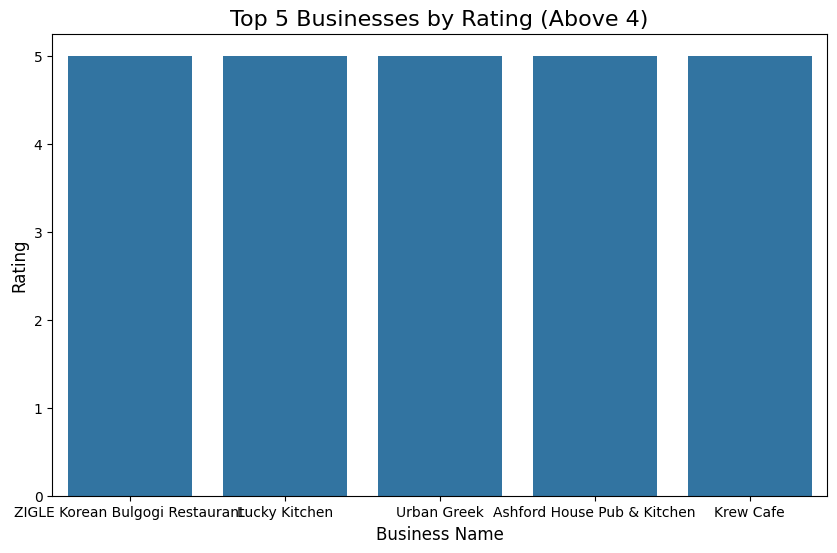

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Execute the SQL query to get top 5 rated businesses
top_rated_businesses = spark.sql("""
SELECT name, rating, price, location
FROM edm_sc
WHERE rating > 4
ORDER BY rating DESC
LIMIT 5
""")

# Convert Spark DataFrame to Pandas DataFrame for visualization
top_rated_businesses_pandas = top_rated_businesses.toPandas()

# Plotting the number of businesses per category
plt.figure(figsize=(10,6))
sns.barplot(x='name', y='rating', data=top_rated_businesses_pandas)
plt.title('Top 5 Businesses by Rating (Above 4)', fontsize=16)
plt.xlabel('Business Name', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()


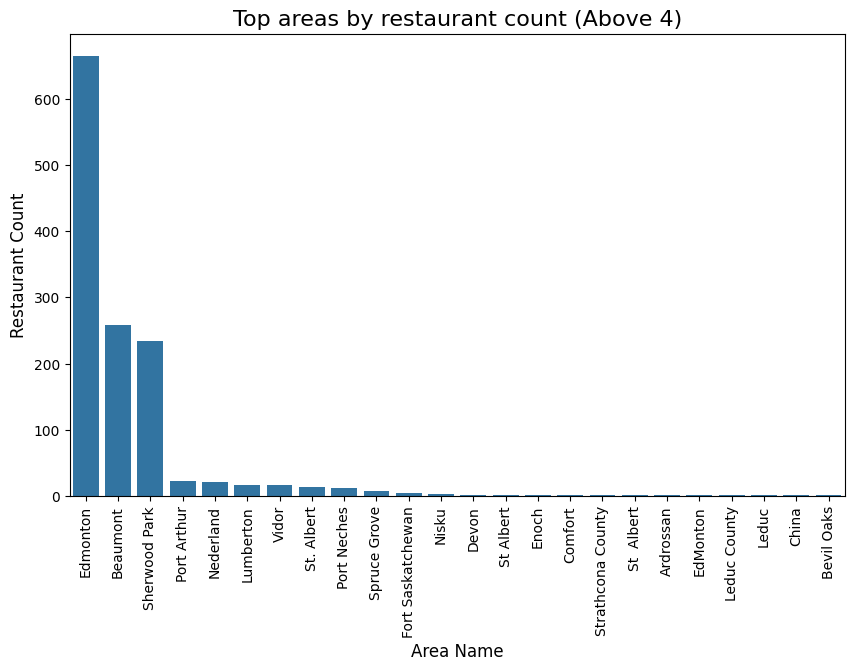

In [ ]:
#Number of restaurants in the areas of city
restaurant_areas = spark.sql(
    """
                SELECT location['city'], count('name') as total_restaurants
                FROM edm_sc
                WHERE location['city'] IS NOT NULL
                GROUP BY location['city']
                ORDER BY total_restaurants DESC
                """
)
# restaurant_areas.show()
# Convert Spark DataFrame to Pandas DataFrame for visualization
restaurant_areas_pandas = restaurant_areas.toPandas()

plt.figure(figsize=(10,6))
sns.barplot(x='location[city]', y='total_restaurants', data=restaurant_areas_pandas)
plt.title('Top areas by restaurant count (Above 4)', fontsize=16)
plt.xlabel('Area Name', fontsize=12)
plt.ylabel('Restaurant Count', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Top restaurant types
restaurant_types = spark.sql(
    """
                SELECT location['city'], categories_title as categories, count('categories_title') as total_restaurants
                FROM edm_sc
                WHERE location['city'] = 'Edmonton'
                GROUP BY location['city'],categories
                ORDER BY total_restaurants DESC
                """
)
restaurant_types.show()

+--------------+------------------+-----------------+
|location[city]|        categories|total_restaurants|
+--------------+------------------+-----------------+
|      Edmonton|      Coffee & Tea|               84|
|      Edmonton|             Cafes|               61|
|      Edmonton|              Pubs|               55|
|      Edmonton|              Bars|               26|
|      Edmonton|    Canadian (New)|               21|
|      Edmonton|       Sports Bars|               20|
|      Edmonton|             Pizza|               17|
|      Edmonton|           Lounges|               15|
|      Edmonton|          Bakeries|               14|
|      Edmonton|Breakfast & Brunch|               13|
|      Edmonton|           Italian|               12|
|      Edmonton|            Indian|               12|
|      Edmonton|          Japanese|               11|
|      Edmonton|           Chinese|               11|
|      Edmonton|           Burgers|               11|
|      Edmonton|            

Conclusion & Next Steps

### Conclusion
Summarize the key findings from your analysis, explaining how they support your business idea. For example:

- **Top Rated Businesses**: We identified the highest-rated businesses, which are ideal candidates for recommendation.
- **Category Insights**: Our analysis showed which categories are most popular in the Yelp dataset.

### Future Steps
- **Expand Data Collection**: Collect more data points (e.g., reviews, more businesses).
- **Improve Recommendations**: Use the data to create a recommendation algorithm.
